$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

# TP Simulation du Modèle d'Ising par Metropolis Hastings 

## 1. Modèle d'Ising

### 1.1 Description du modèle

Le *modèle d'Ising*, dû à Ernst Ising, est l'un des champs de Gibbs les plus simples et les plus étudiés. Il décrit les transitions de phase de l'aimantation d'un métal ferromagnétique. Dans ce qui suit on le décrit en deux dimensions, mais on peut le définir en dimension plus grande.

Considérons un réseau de taille $N \times N$, que l'on note $\Ga=\{1,\ld,N\}^2$. A chaque position $(i,j)$ du réseau, on associe une quantité $s_{i,j}$, appelée *spin*, prenant les valeurs $\pm 1$. 
On note $S=(s_{i,j})_{(i,j)\in \Ga}$ une configuration possible de spins. L'ensemble des configurations (ou états) du réseau est donc $E = \{-1,1\}^\Ga$, et est potentiellement de très grande dimension ! 

Ci-dessous on représente une configuration possible pour un petit réseau $6\times 6$, avec deux couleurs possibles sur les positions, correspondant aux valeurs $-1$ et $1$. 


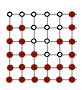

Les spins interagissent avec leurs plus proches voisins. On peut définir l'énergie d'une configuration $S$ comme 
$$E(S) = \sum_{(k,l)\sim (i,j)}(s_{k,l}-s_{i,j})^2,$$
où $(i,j)\sim (k,l)$ signifie que les positions $(i,j)$ et $(k,l)$ sont voisins (à distance 1) sur le réseau $\Ga$. 
On voit que si l'on cherche à minimiser $E$, on tombe sur deux configurations constantes (celle où les spins sont tous égaux à $1$ et celle où ils sont tous égaux à $-1$). 
Comme les valeurs $s_{i,j}$ valent $\pm 1$, en développant l'énergie ci-dessous, on s'aperçoit qu'il est équivalent de minimiser l'énergie  
$$H(S) = -\sum_{(k,l)\sim (i,j)}s_{k,l}s_{i,j},$$
On associe à cette énergie la mesure de Gibbs suivante
$$\mu_\bet(S)=\ff{Z_\bet}\me^{-\bet H(S)},$$
où la fonction de partition $Z_\bet$ sert à normaliser la mesure de Gibbs, et où $\bet:=\ff T$, $T>0$ pouvant s'interprèter comme une température : quand $T$ est grand, les fluctuations thermiques dominent et le système est désordonné, par contre pour $T$ proche de $0$ les configurations de basse énergie sont privilégiées et les spins ont tendance à s'aligner.

### 1.2 Simulation du modèle d'Ising

**Dans ce qui suit, nous allons implémenter l'algorithme de Metropolis-Hastings afin de simuler sous la loi $\mu_\bet$ du modèle d'Ising.**

Retraduit dans le formalisme des chaînes de Markov, une configuration $S$ correspond à un état et l'espace d'états est $E = \{-1,1\}^\Ga$. Pour un domaine de taille $N = 40$, le cardinal de $E$ est $2^{40×40}\approx   10^{481}$. Il est donc impossible d'énumérer toutes les configurations pour calculer la distribution $\mu_\bet$. 

Pour tout $(i,j)\in \Ga$, on note $S^{\rightarrow(i,j)}$ la configuration déduite de $S$ en changeant simplement le signe du spin en $(i,j)$. Deux configurations sont dites voisines si elles peuvent être déduites l'une de l'autre par un changement de spin en un point.

Pour la matrice de transition $Q$ qui va nous servir à simuler la chaîne de Markov, on la prend nulle partout sauf pour les couples de configurations voisines, et telle que   
$$\forall (i,j)\in \Ga, \qquad  Q(S,S^{\rightarrow(i,j)}) = \ff{\op{Card}(\Ga)}.$$

Cette matrice de transition correspond au mécanisme suivant : un site $(i,j)$ est choisi au hasard dans $\Ga$ et son spin  dans $S$ est retourné (passe de $1$ à $-1$ ou le contraire). Ce sont les seules transitions autorisées. Ces transitions modifient les configurations seulement localement, par conséquent la variation de l'énergie correspondant au changement du spin en $(i,j)$ ne dépend que de la moyenne des spins autour de $(i,j)$:

$$\Delta H(S,S^{\rightarrow(i,j)}):=H(S^{\rightarrow(i,j)})-H(S)=-\sum_{(k,l)\sim (i,j)}s_{k,l}(-s_{i,j})-\left(-\sum_{(k,l)\sim (i,j)}s_{k,l}s_{i,j}\right)=2s_{i,j}\sum_{(k,l)\sim (i,j)}s_{k,l}.$$

La fonction $\rho$   est alors donnée par 
$$\rho(S,S^{\rightarrow(i,j)})=\me^{-\bet\Delta H(S,S^{\rightarrow(i,j)}) } .$$


### 1.3 Algorithme de Metropolis-Hastings

On en déduit l'algorithme suivant :

*Algorithme de Metropolis-Hastings de simulation de $S\approx \mu_\bet$*
1. *Initialiser  avec une configuration $S$ quelconque.*
2. *Répéter un grand nombre de fois :*
    + *tirer, indépendamment, $(i,j)$ de loi unif. sur $\Ga$ et $U\sim\cU([0,1])$,*
    + *remplacer $S$ par $S^{\rightarrow(i,j)}$ si $U <\me^{-\bet\Delta H(S,S^{\rightarrow(i,j)}) }$  et le laisser invariant sinon.*
3. *Rendre $S$.*


### 1.4 Exercice

On va implémenter l'algorithme précédent et le faire tourner pour diverses configurations initiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from TP_Ising import *

In [3]:
# paramètres
beta=10               #beta = 1/T
N,Npas=int(1e2),int(2e5)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  

1. **Ecrire une fonction `transition(S,N,beta)` qui prend en entrée une image $S$ composée de $1$ et des $-1$, de taille $N\times N$, choisit une position aléatoire $(i,j)$ dans la grille de l'image, et décide si on modifie ou non la valeur en ce point (en multipliant sa valeur par par $-1$) en fonction de l'évolution de l'énergie $H$, comme expliqué au dessus. Utiliser cette fonction pour faire évoluer la chaîne de Markov sur `Npas` itérations.** 

In [4]:
def deltaH(i,j,S,N):
    return -2*S[i,j]*(S[i-1,j] + S[i,j-1] + S[(i+1)%N,j] + S[i,(j+1)%N])

In [5]:
def transition(S, N, beta):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2)
    rho = np.exp(beta*deltaH(i,j,S,N))
    if U < rho:
        S[i,j] *= -1
    return S

In [6]:
# Initialisation (essayer plusieurs états initiaux possible, très aléatoire ou au contraire très déterministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation aléatoire
    
# On fait evoluer la chaîne de Markov    
S = np.copy(S0)
for t in range(Npas):
    S=transition(S,N,beta)

2. **Tester avec différentes initialisations possibles (très aléatoires ou au contraire très déterministes), et avec plusieurs valeurs de $\beta$ (ou de la température $T$). Comment varient les résultats en fonction de la température ?**

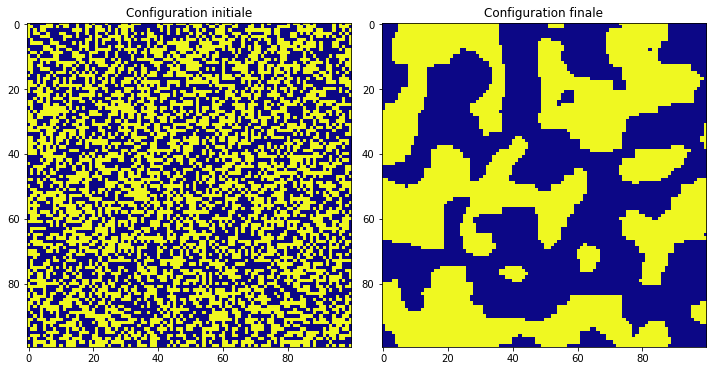

In [7]:
# Affichage état initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

### Plus la température est élevée plus la configuration finale, S est déterministe et les spins s'alignent au contraire à basse température, on a un résultat très désordonné.

## 2. Utilisation du modèle d'Ising conditionné par une image

On peut modifier légèrement le modèle précédent en le forçant à ne pas trop s'éloigner d'une image $I$ sur le même réseau (dans l'interprétation physique, $I$ réprésente un champ magnétique). L'idée est de simuler non plus directement sous la loi $\mu_\bet$ mais sous une loi a posteriori qu'on va noter $\nu_\bet$ et qui dépend de $I$. Notons $I$ cette image, de taille $N\times N$, **qu'on suppose à valeurs dans $[-1,1]$** (si l'image est sur $[0,256]$ ou sur $[0,1]$, il faudra donc la normaliser pour que son minimum soit à $-1$ et son maximum à $1$). On note $I_{i,j}$ la valeur de l'image à la position $(i,j)$. 

L'énergie associée à la configuration $S$ est alors
$$E(S|I) =  \sum_{(i,j)\sim (k,l)} (s_{i,j}-s_{k,l})^2+c\sum_{(i,j)\sim (k,l)} (I_{i,j} - s_{i,j})^2,$$
avec $c$ une constante permettant de modifier le poids relatif des deux termes.
En développant, on se rend compte que cette énergie est égale (à une constante additive près ne dépendant pas de $S$) à $2H(S|I)$ avec
 $$H(S|I) = -\sum_{(i,j)\sim (k,l)}s_{i,j}s_{k,l} - 2c \sum_{i,j} s_{i,j} I_{i,j}.$$
Le premier terme de l'énergie favorise les états avec des zones constantes, alors que le deuxième favorise les états bien corrélés avec l'image $I$.

On note $\nu_\bet$ la mesure
$$\nu_\bet(S) = \ff{Z_\bet}\me^{-\bet H(S|I)}.$$

Lorsqu'on modifie la valeur de $S$ en la position $(i,j)$, la variation de l'énergie $H(S|I)$ entre les deux états s'écrit 
$$\Delta H_{S|I}(S,S^{\rightarrow(i,j)}):=H(S^{\rightarrow(i,j)}|I)-H(S|I)=2s_{i,j}\sum_{(k,l)\sim (i,j)}s_{k,l} + 2 c s_{i,j} I_{i,j}.$$

La fonction $\rho$   est alors donnée par 
$$\rho(S,S^{\rightarrow(i,j)})=\me^{-\bet\Delta H_{S|I}(S,S^{\rightarrow(i,j)}) } .$$

### Exercice

1. Commencez par récupérer une image en ligne, par exemple celle du cameraman disponible ici 
https://web.stanford.edu/class/ee398b/data/image/cman.tif
et importez cette image à l'aide de plt.imread dans une matrice. Normalisez-la pour qu'elle soit entre -1 et 1.

2. Implémentez l'algorithme de Metropolis-Hastings pour cette mesure, pour plusieurs valeurs de $c$ et de $\beta$ et commentez les résultats. Quelle est l'influence du paramètre $c$ sur les résultats ? Déterminer des témpératures pour lesquelles les échantillons semblent dépendre très peu de l'image $I$, et des températures où au contraire le résultat semble très fortement corrélé à $I$. 

3. Faire tourner l'algorithme pour $T=0$ (on accepte une transition si et seulement si elle fait diminuer l'énergie). Que doit-on obtenir en pratique ? Combien d'itérations faut-il pour que l'algorithme se stabilise ? Le résultat obtenu dépend-il de l'initialisation ?

-1.0 1.0


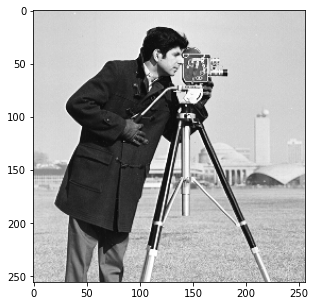

In [8]:
I = plt.imread("/Users/bouacha_lazhar/OneDrive/Master MMA/M2 MMA/M2 S3/Algorithmes stochastiques/cman.tiff")/255  # image sur [0,1]
plt.figure(figsize=(5, 5))
plt.imshow(I,cmap='gray')
I = 2*(I-I.min())/(I.max() - I.min()) - 1
print(I.min(), I.max())

In [9]:
def deltaH_im(i,j,S,c,N,I):
    return deltaH(i,j,S,N) - 4*c*S[i,j]*I[i,j]

In [10]:
def transition_im(S,N,c,beta,I):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2)
    rho = np.exp(beta*deltaH_im(i,j,S,c,N,I))
    if U < rho:
        S[i,j] *= -1
    return S

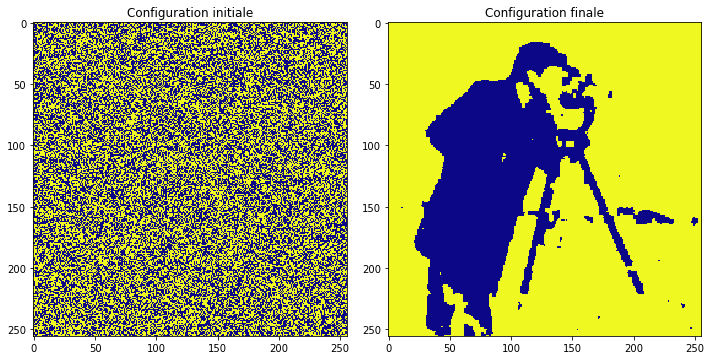

In [11]:
# paramètres
beta=int(1)                   #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  
c=0.5

# Initialisation (essayer plusieurs états initiaux possible, très aléatoire ou au contraire très déterministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation aléatoire
    
# On fait evoluer la chaîne de Markov    
S= np.copy(S0)
for t in range(Npas):
    S=transition_im(S,N,c,beta,I)

# Affichage état initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

/Users/bouacha_lazhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


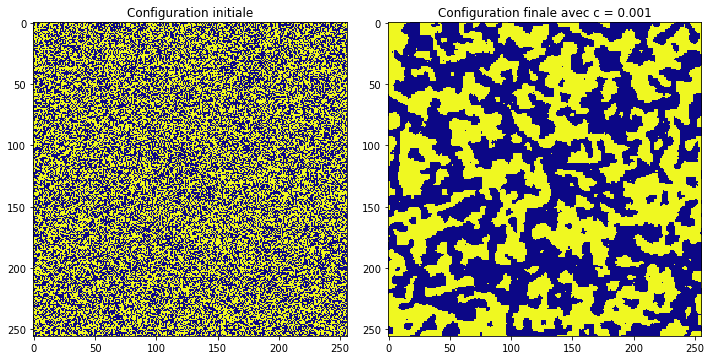

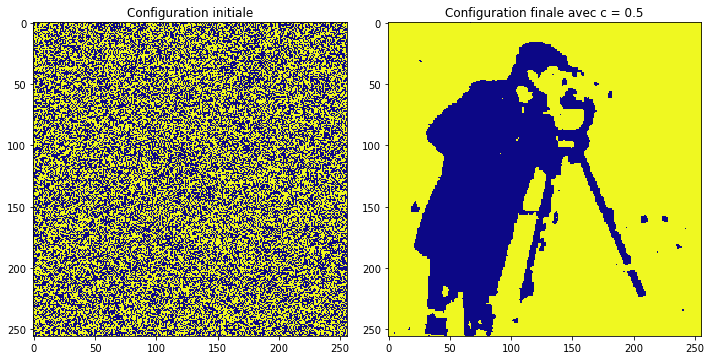

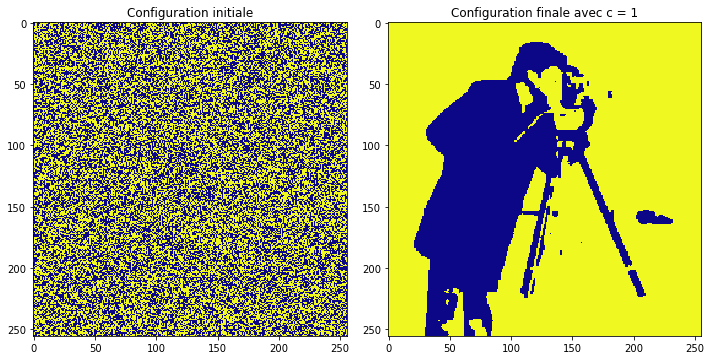

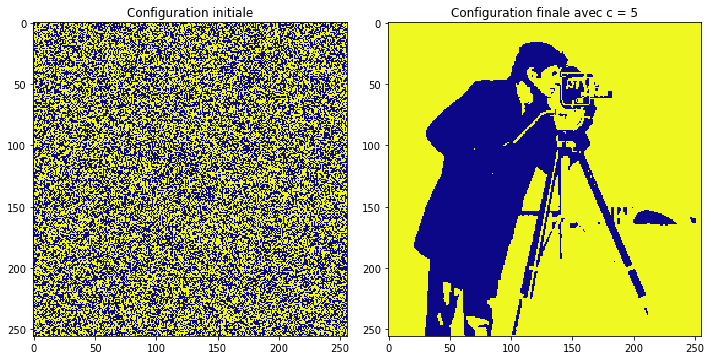

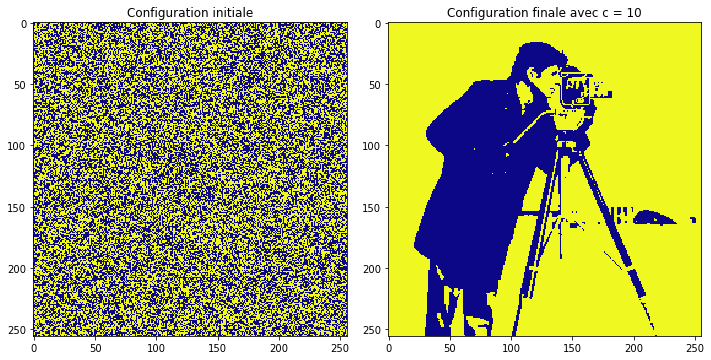

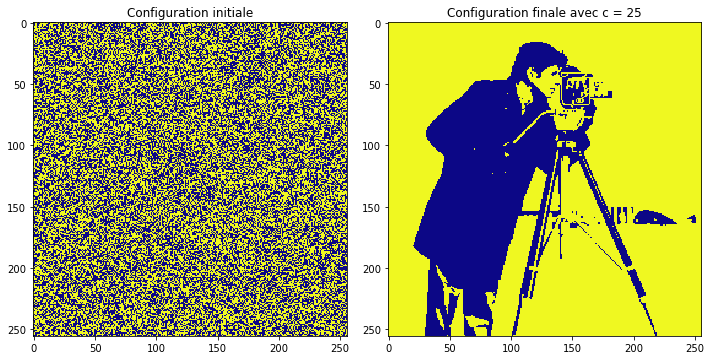

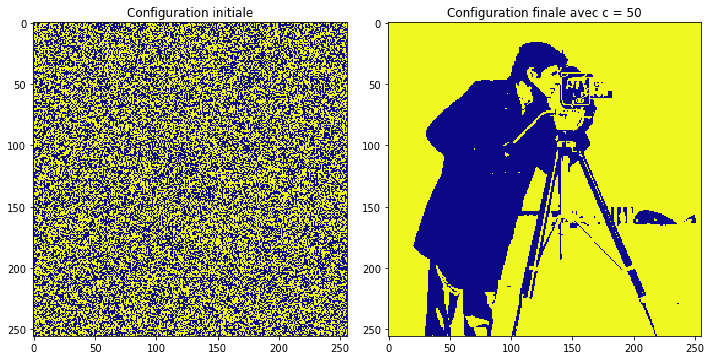

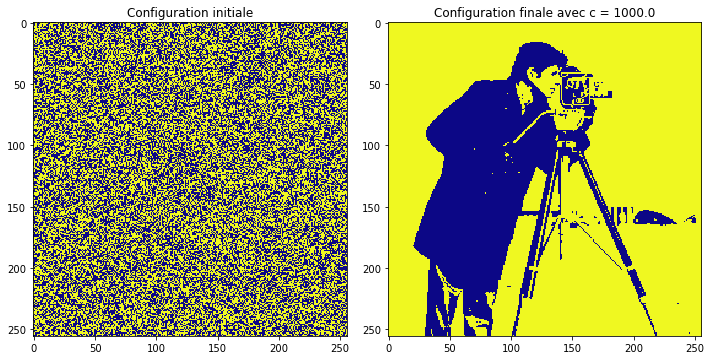

In [12]:
# paramètres
beta=int(1)                   #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  
c=[1e-3, 0.5, 1, 5, 10, 25, 50, 1e3]

# Initialisation (essayer plusieurs états initiaux possible, très aléatoire ou au contraire très déterministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation aléatoire
    
# On fait evoluer la chaîne de Markov    
for ci in c:
    S= np.copy(S0)
    for t in range(Npas):
        S=transition_im(S,N,ci,beta,I)
    
    # Affichage état initial et final
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].imshow(S0, interpolation='none',cmap='plasma')
    axes[0].set_title('Configuration initiale')
    axes[1].imshow(S, interpolation='none',cmap='plasma')
    axes[1].set_title('Configuration finale avec c = ' +str(ci))
    fig.tight_layout()

#### Plus la valeur de c est élevée plus le résultat reproduit fidèlement l'image et de ce fait minimise l'aléa. 

/Users/bouacha_lazhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


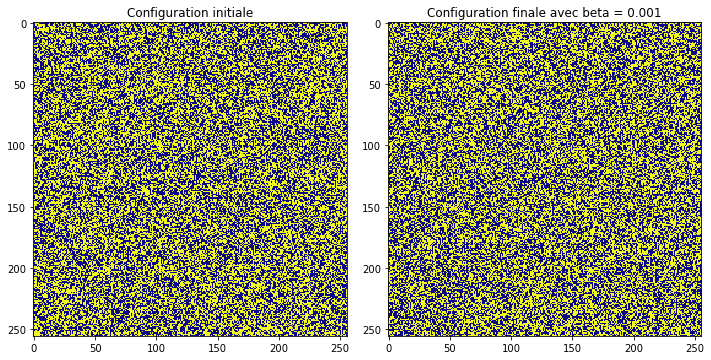

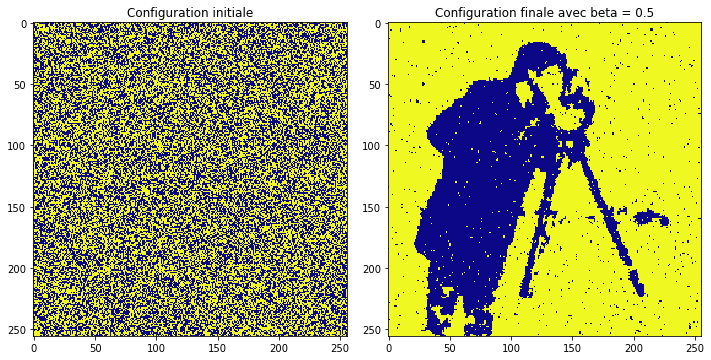

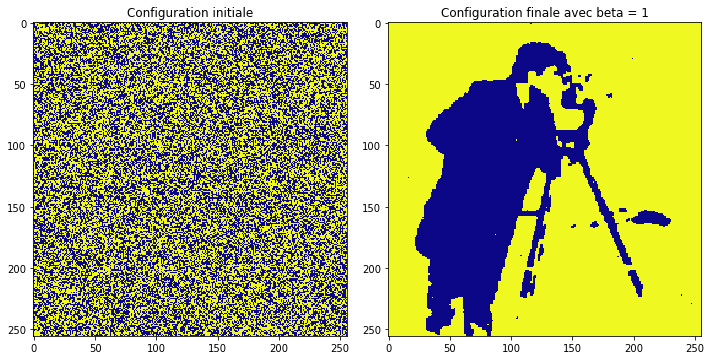

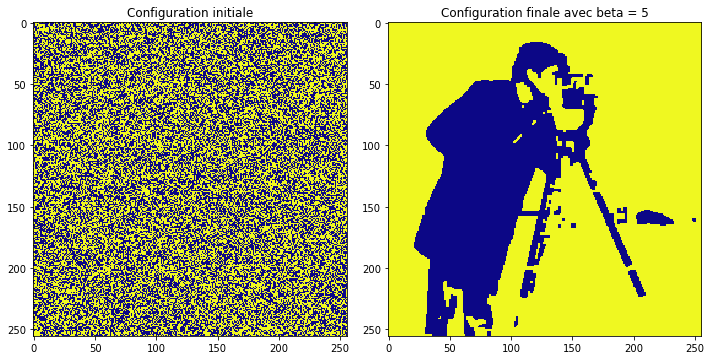

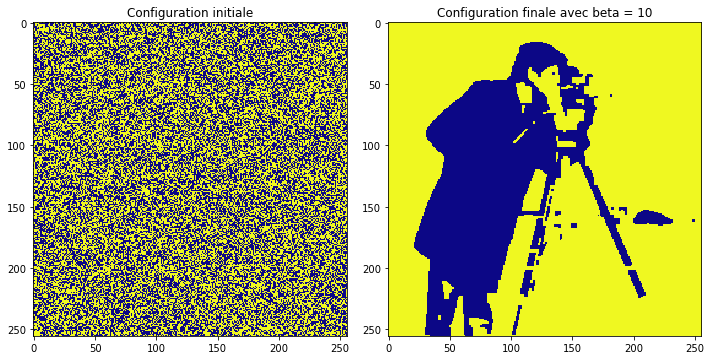

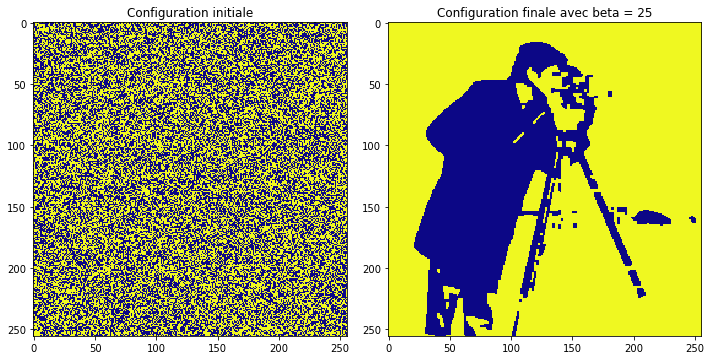

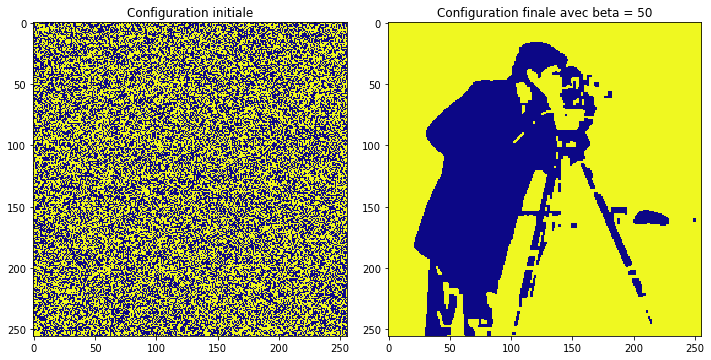

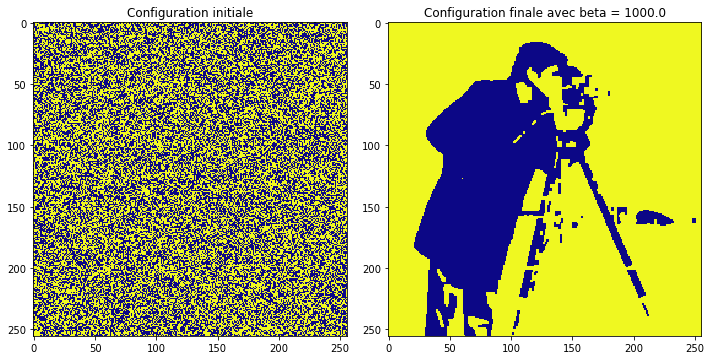

In [13]:
# paramètres
beta=[1e-3, 0.5, 1, 5, 10, 25, 50, 1e3]                #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  
c=0.5

# Initialisation (essayer plusieurs états initiaux possible, très aléatoire ou au contraire très déterministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation aléatoire
    
# On fait evoluer la chaîne de Markov    
for bi in beta:
    S= np.copy(S0)
    for t in range(Npas):
        S=transition_im(S,N,c,bi,I)
    
    # Affichage état initial et final
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axes[0].imshow(S0, interpolation='none',cmap='plasma')
    axes[0].set_title('Configuration initiale')
    axes[1].imshow(S, interpolation='none',cmap='plasma')
    axes[1].set_title('Configuration finale avec beta = ' +str(bi))
    fig.tight_layout()

#### Les températures inférieures à 1 semblent dépendre très peu de l'image  𝐼  tandis que les températures supérieures à 1 sont très corrélées à  𝐼.

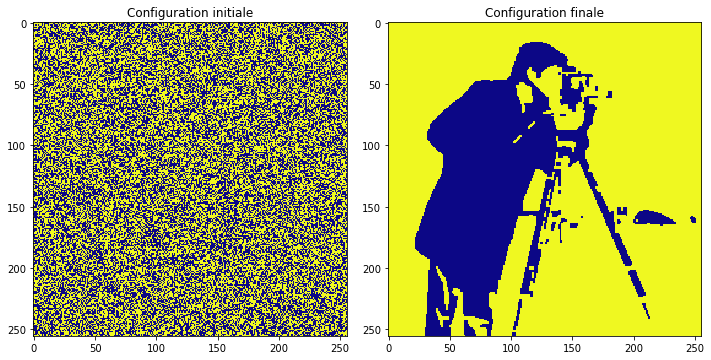

In [14]:
# paramètres
beta=np.inf                #beta = 1/T
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  
c=0.5


# Initialisation (essayer plusieurs états initiaux possible, très aléatoire ou au contraire très déterministes)
S0=2*np.random.randint(2,size=(N,N))-1   # initialisation aléatoire
    
# On fait evoluer la chaîne de Markov    
S= np.copy(S0)
for t in range(Npas):
    S=transition_im(S,N,c,beta,I)

# Affichage état initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

### En pratique les spins doivent s'aligner sur l'image I. Il faut 1 million d'itérations pour obtenir un résultat stable. Étant donné que S est une matrice aléatoire le résultat ne dépend pas de l'initialisation.

## 3. Recuit simulé
On va maintenant calculer le maximum de vraisemblance de la loi $\nu_\bet$ en utilisant **l'algorithme de recuit simulé**. 

On rappelle que cet algorithme diffère de celui de Metropolis-Hastings uniquement par le fait qu'on fait lentement baisser la température $T$ (ou augmenter $\beta$) au fur et à mesure des itérations. 
 
Pour la fonction $t\mapsto\bet_t$, on propose de choisir $\beta(t)=2*log(t+2)$.

1. Modifiez vos fonctions précédentes pour implémenter l'algorithme de recuit simulé sur l'exemple précédent. Faites un graphe de l'énergie au cours des itérations. 

In [15]:
def transition_im2(S,N,c,beta,I):
    U = np.random.uniform()
    i,j = np.random.randint(N, size = 2, dtype = int)
    rho = np.exp(beta*deltaH_im(i,j,S,c,N,I))
    if U < rho:
        S[i,j] *= -1
    return S, rho

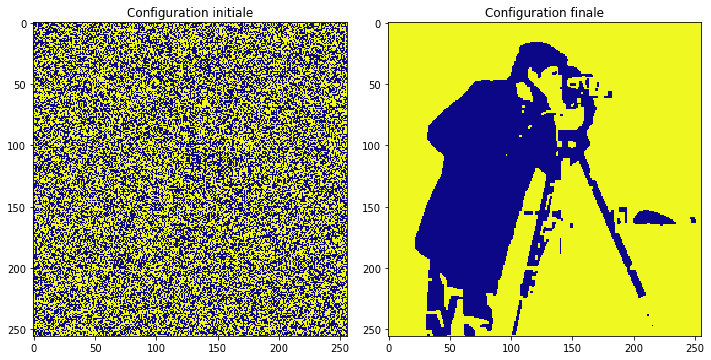

In [16]:
# paramètres
N,Npas=256,int(1e6)   # NxN est le nombre de positions sur la grille et Npas est le nb de pas d'évolution de la chaîne  

# Initialisation aléatoire
S0=2*np.random.randint(2,size=(N,N))-1  

# On fait evoluer la chaîne de Markov    
S = np.copy(S0)
Er = []
Energie = []
for t in range(Npas):
    S, rho = transition_im2(S,N,c,2*np.log(t+2),I)
    Er.append(rho)
    if t%15000 == 0:
        Energie.append(np.mean(Er))

# Affichage état initial et final
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(S0, interpolation='none',cmap='plasma')
axes[0].set_title('Configuration initiale')
axes[1].imshow(S, interpolation='none',cmap='plasma')
axes[1].set_title('Configuration finale')
fig.tight_layout()

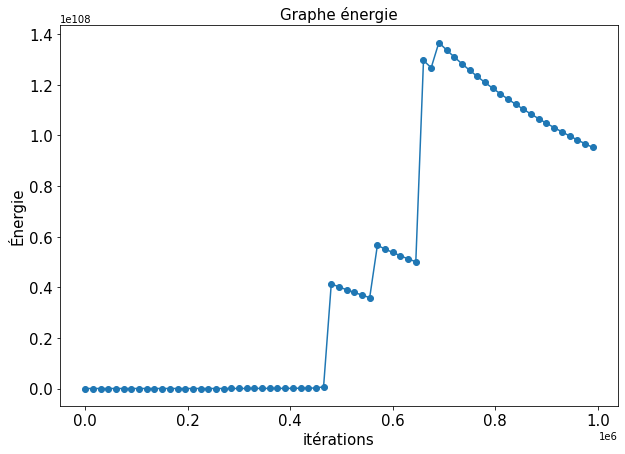

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(range(0, Npas, 15000), Energie, 'o-')
plt.title('Graphe énergie', fontsize=15)
plt.xlabel('itérations', fontsize=15)
plt.ylabel('Énergie', fontsize=15)
plt.tick_params(axis = 'both', labelsize = 15)